In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [2]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
from matplotlib import colors
import matplotlib.pyplot as plt

from toolz.curried import pipe, curry

In [3]:
flist = sorted(glob.glob("minEnergySlabs_pores/*_pore.mat"))
print(len(flist))
cifs = np.asarray([fname.split("/")[-1].split("zz_")[-1].split("_pore")[0] for fname in flist])[:,None]

685


In [4]:
columns = ["cif", "pld", "lcd", "asa", "av", "psd mean", "psd std", "n_paths", "paths mean", "paths std", "xdim", "ydim", "zdim", "n_channels"]
table = np.zeros((len(flist), 13))
for i, fname in enumerate(flist):
    s = sio.loadmat(fname)
    table[i, 0] = s['pld'][0]
    table[i, 1] = s['lcd'][0]
    table[i, 2] = s['asa'][0]
    table[i, 3] = s['av'][0]
    table[i, 4] = np.mean(s['psd'][0])
    table[i, 5] = np.std(s['psd'][0])
    if len(s['paths']) is not 0:
        table[i, 6] = len(s['paths'][0])
    table[i, 7] = np.mean(s['paths'])
    table[i, 8] = np.std(s['paths'])
    table[i, 9] = s['dim'][0][0]
    table[i, 10] = s['dim'][0][1]
    table[i, 11] = s['dim'][0][2]
    if len(s['paths']) is not 0:
        table[i, 12] = s['n_paths'][0]
table = np.concatenate([cifs, table], axis=1)

In [7]:
df = pd.DataFrame(data=table, index=table[:,0], columns=columns)
# df.to_csv("slabs_minEnergy.csv", sep=',')

In [10]:
df.head()

,cif,pld,lcd,asa,av,psd mean,psd std,n_paths,paths mean,paths std,xdim,ydim,zdim,n_channels
"ABWff-[1,0,1]-L-0.732814_0-U-0.748843_0-ss-12.8142965856","ABWff-[1,0,1]-L-0.732814_0-U-0.748843_0-ss-12....",2.3798828125,4.538722287164086,1795.0500000000004,493.2820000000001,1.5187443683023465,0.22508298042356942,72.0,2.1545286220009303,0.639665364266995,10.6,25.9,14.3,1.0
"ABWff-[1,0,1]-L-0.732814_0-U-0.748843_0-ss-6.43686394024","ABWff-[1,0,1]-L-0.732814_0-U-0.748843_0-ss-6.4...",2.3271484375,4.638965401897281,734.2500000000001,218.62600000000006,1.5194785701510176,0.20494108195781913,6.0,1.3012768029863226,0.036992427735370835,10.6,25.8,7.9,3.0
"ACOff-[1,1,0]-L-0.674661_0-U-0.674735_0-ss-14.0182230666","ACOff-[1,1,0]-L-0.674661_0-U-0.674735_0-ss-14....",3.4345703125,5.531726674375732,3514.5900000000006,1424.6130000000003,1.7724441277006209,0.30382913019164925,54.0,2.0167399300529865,0.5430758186027801,19.7,27.6,15.5,1.0
"ACOff-[1,1,0]-L-0.674661_0-U-0.674735_0-ss-7.12771441351","ACOff-[1,1,0]-L-0.674661_0-U-0.674735_0-ss-7.1...",3.5927734375,5.531726674375732,2008.8300000000004,911.8130000000002,1.741056940152521,0.46591203521685676,7.0,1.190899978457532,0.10377206825876667,19.7,27.6,8.7,1.0
"AEIff-[0,0,1]-L-0.166088_0-U-0.666091_0-ss-27.551659809","AEIff-[0,0,1]-L-0.166088_0-U-0.666091_0-ss-27....",3.8564453125,7.517978451685001,7945.460000000002,4662.617000000001,2.2257429411028786,0.6915199025523178,130.0,1.7664205505697768,0.26735448093711667,25.8,25.3,29.5,1.0


In [11]:
df.describe()

,cif,pld,lcd,asa,av,psd mean,psd std,n_paths,paths mean,paths std,xdim,ydim,zdim,n_channels
count,685,685,685,685,685,685,685,685,685,685,685,685,685,685
unique,685,150,435,685,685,685,685,432,524,524,142,204,255,6
top,"OFFff-[1,1,0]-L-0.25068_1-U-0.765605_1-ss-32.9...",2.1337890625,7.135825109964509,4597.490000000001,789.0300000000002,1.6519436820449325,0.4736846987820665,0.0,nan,nan,15.4,27.8,13.3,1.0
freq,1,29,8,1,1,1,1,162,162,162,21,17,12,497


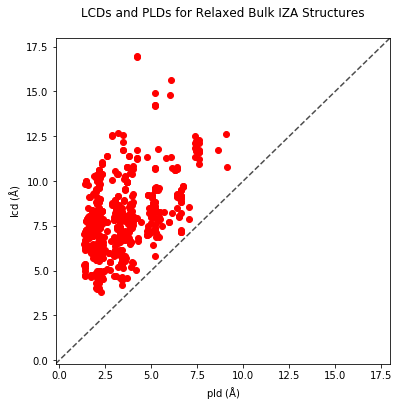

In [12]:
l1 = np.array(df["pld"]).astype("float")
l2 = np.array(df["lcd"]).astype("float")

plt.figure(figsize=(6, 6))
plt.scatter(l1, l2, c="r")
plt.title("LCDs and PLDs for Relaxed Bulk IZA Structures\n")
plt.xlabel("pld $(\mathrm{\AA})$")
plt.ylabel("lcd $(\mathrm{\AA})$")
plt.xlim([-0.2, 18.0])
plt.ylim([-0.2, 18.0])
plt.plot([-0.2, 18.0], [-0.2, 18.0], ls="--", c=".3")
plt.show()

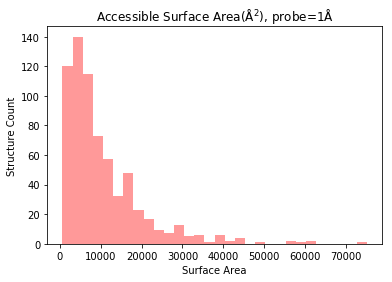

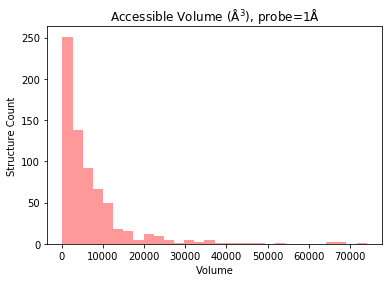

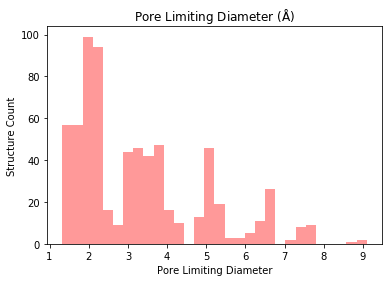

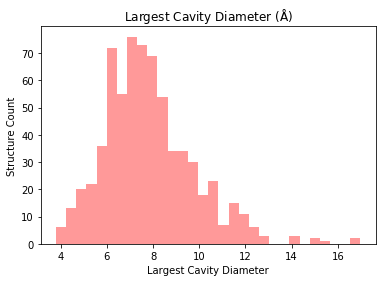

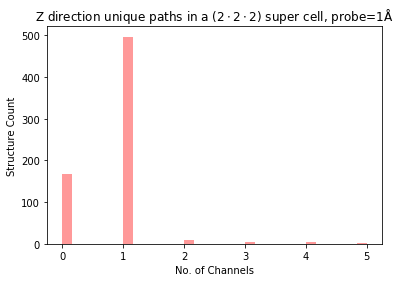

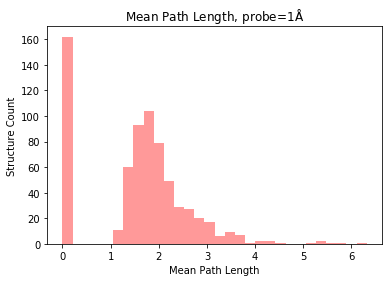

In [18]:
l = np.array(df["asa"]).astype("float")
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("Accessible Surface Area$(\mathrm{\AA}^2)$, probe=1$\mathrm{\AA}$")
plt.xlabel("Surface Area")
plt.ylabel("Structure Count")
plt.show()

l = np.array(df["av"]).astype("float")
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("Accessible Volume $(\mathrm{\AA}^3)$, probe=1$\mathrm{\AA}$")
plt.xlabel("Volume")
plt.ylabel("Structure Count")
plt.show()

l = np.array(df["pld"]).astype("float")
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("Pore Limiting Diameter $(\mathrm{\AA})$")
plt.xlabel("Pore Limiting Diameter")
plt.ylabel("Structure Count")
plt.show()

l = np.array(df["lcd"]).astype("float")
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("Largest Cavity Diameter $(\mathrm{\AA})$")
plt.xlabel("Largest Cavity Diameter")
plt.ylabel("Structure Count")
plt.show()

l = np.array(df["n_channels"]).astype("float")
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("Z direction unique paths in a $(2\cdot 2\cdot 2)$ super cell, probe=1$\mathrm{\AA}$")
plt.xlabel("No. of Channels")
plt.ylabel("Structure Count")
plt.show()

l = np.array(df["paths mean"]).astype("float")
l[np.isnan(l)] = 0
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("Mean Path Length, probe=1$\mathrm{\AA}$")
plt.xlabel("Mean Path Length")
plt.ylabel("Structure Count")
plt.show()

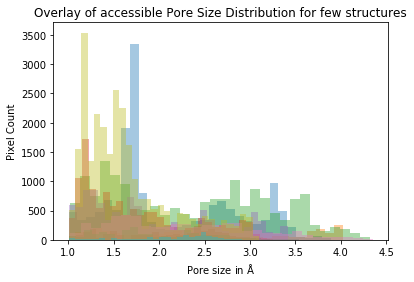

In [17]:
np.random.seed(17263)
n_indx = np.random.randint(low=0, high=len(flist)-1, size=10)
for i in n_indx:
    s = sio.loadmat(flist[i])
    psd = (s['psd'][0])
    sns.distplot(psd, bins=30, kde=False)
plt.title("Overlay of accessible Pore Size Distribution for few structures")
plt.xlabel("Pore size in $\mathrm{\AA}$")
plt.ylabel("Pixel Count")
plt.show()